# Introduction to Neural Netowrk Classification with TensorFlow

* Binary Classification
* Multiclass Classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand. Let's visualize

In [5]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'Label':y})

In [7]:
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


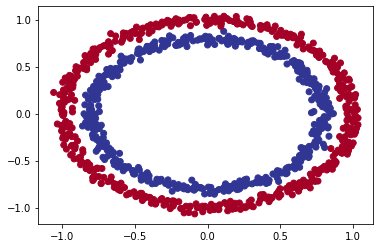

In [11]:
# Visualize with Matplotlib
import matplotlib.pyplot as plt

plt.scatter(circles['X0'],circles['X1'],c=circles['Label'],cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [12]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# Check how many samples we are working with
len(X),len(y)

(1000, 1000)

In [14]:
# View the first examples
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modeling

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak

In [22]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [23]:
# Let's try and improve our model by training for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy, it is performing guessing. So let's add an extra layer

In [24]:
from re import VERBOSE
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [25]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

## Improving our Model

In [35]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    # tf.keras.Input(shape=(None,2)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. fit the model
model_3.fit(X,y,epochs=100,verbose=0)

# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000


[0.0044919829815626144, 1.0]

To visualize our model's prediction lets create a function. The function will:

* Take in a trained model
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictinos as well as a line between the different zones  ( where each unique class falls)


In [53]:
import numpy as np

def plot_decision_boundary(model,X,y):
  # Plots the decision boundary created by a model predicting X

  # Define the axis boundaries of the plot and create a meshgrid
  X_min,X_max = X[:,0].min()-0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min()-0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min,X_max,100),
                       np.linspace(y_min,y_max,100))
  
  # Create X value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0])>1:
    print('Doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print('Doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 3ms/step
Doing binary classification


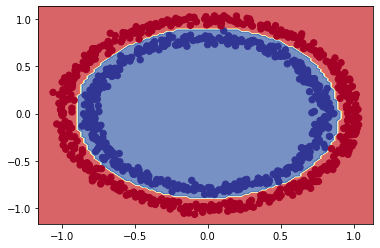

In [54]:
# Check out the predictions our model 
plot_decision_boundary(model=model_3,X=X,y=y)